# ZCA(Zero-phase Component Analysis) whitening implemantation using SVD

In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
def pair_plot(X, y, figsize=(12,8), bins=50):
    n_samples, n_features = X.shape
    
    plt.figure(figsize=figsize)
    for i in range(n_features):
        for j in range(n_features):
            plt.subplot(n_features, n_features, i*n_features + j + 1)
            if i == j:
                plt.hist(X[:,i], bins=bins)
            else:
                plt.scatter(X[:,i], X[:,j], c=y)
    plt.show()

## Load iris dataset

In [48]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


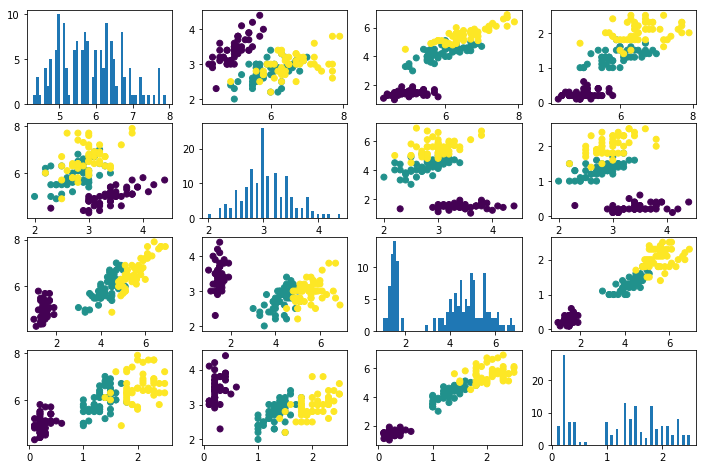

In [59]:
print(np.cov(X.T))
pair_plot(X, y)

## Compare implementations

In [50]:
import sys
sys.path.append('..')

from spmimage.preprocessing.data import WhiteningScaler
from sklearn.decomposition import PCA

## PCA(sklean)

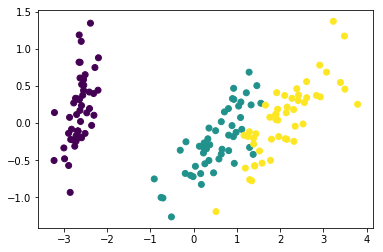

In [5]:
pca = PCA()
X_pca = pca.fit_transform(X)

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

[[  4.22484077e+00   2.34045062e-16  -1.73045192e-17   8.54496412e-18]
 [  2.34045062e-16   2.42243572e-01  -1.67174654e-18   5.02407603e-18]
 [ -1.73045192e-17  -1.67174654e-18   7.85239081e-02   1.42253996e-17]
 [  8.54496412e-18   5.02407603e-18   1.42253996e-17   2.36830271e-02]]


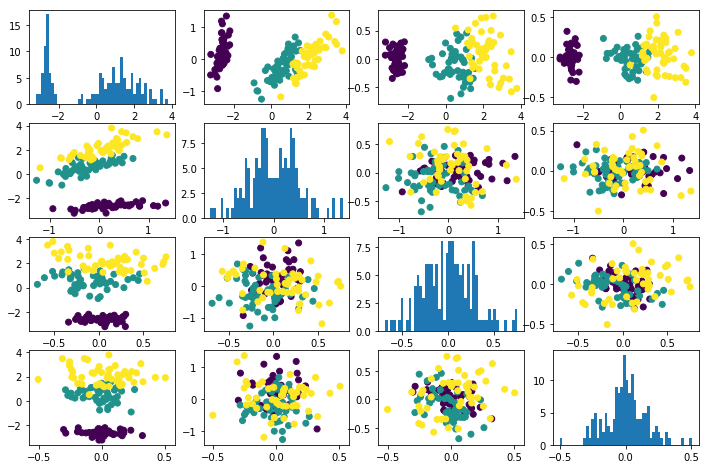

In [58]:
print(np.cov(X_pca.T))
pair_plot(X_pca, y)

## WhiteningScaler(whitening)

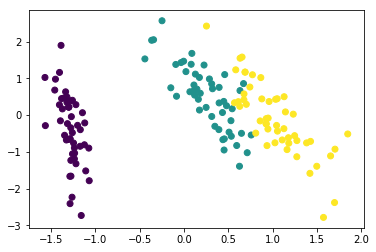

In [6]:
whitening = WhiteningScaler(apply_zca=False)
X_whiten = whitening.fit(X)

plt.figure()
plt.scatter(X_whiten[:,0], X_whiten[:,1], c=y)

[[  1.00000000e+00  -1.98074751e-16   1.75852864e-15   2.03183358e-15]
 [ -1.98074751e-16   1.00000000e+00  -4.93290419e-16  -1.01954166e-16]
 [  1.75852864e-15  -4.93290419e-16   1.00000000e+00  -4.51760942e-16]
 [  2.03183358e-15  -1.01954166e-16  -4.51760942e-16   1.00000000e+00]]


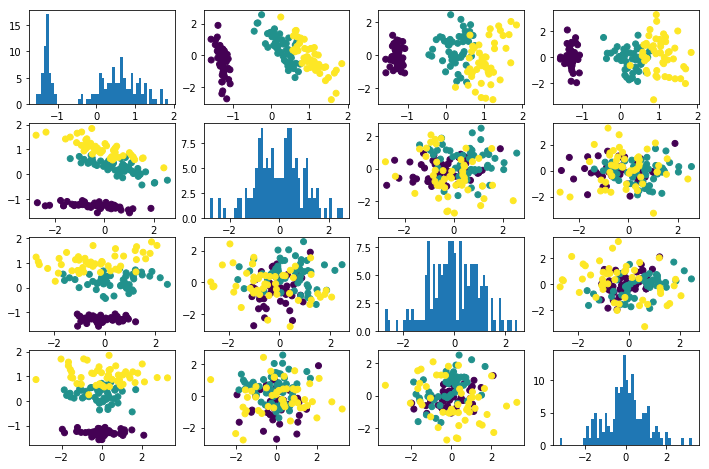

In [57]:
print(np.cov(X_whiten.T))
pair_plot(X_whiten, y)

## WhiteningScaler(ZCA whitening)

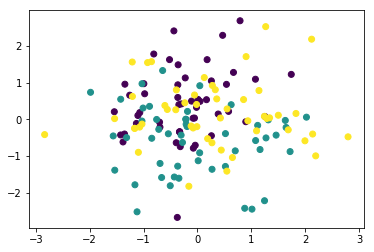

In [7]:
whitening = WhiteningScaler(apply_zca=True)
X_zca = whitening.fit(X)

plt.figure()
plt.scatter(X_zca[:,0], X_zca[:,1], c=y)

[[  1.00000000e+00  -1.53762284e-15   1.72784845e-15   2.33331742e-16]
 [ -1.53762284e-15   1.00000000e+00  -1.60899329e-15  -2.42248645e-16]
 [  1.72784845e-15  -1.60899329e-15   1.00000000e+00   6.93613318e-16]
 [  2.33331742e-16  -2.42248645e-16   6.93613318e-16   1.00000000e+00]]


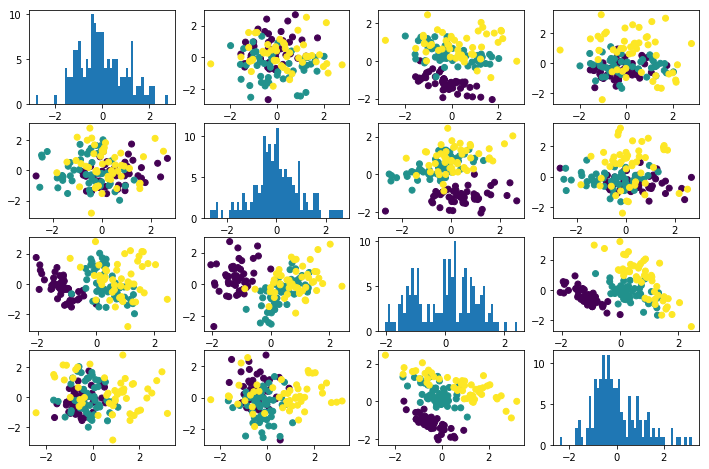

In [61]:
print(np.cov(X_zca.T))
pair_plot(X_zca, y)

## Using ZCA whitening as an image preprocessor

(512, 512)


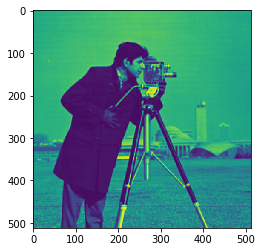

In [62]:
from skimage import data

camera = data.camera()
print(camera.shape)
plt.imshow(camera)

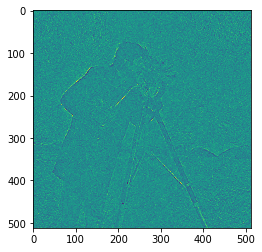

In [63]:
whitening = WhiteningScaler(normalize=True, apply_zca=True)
camera_zca = whitening.fit(camera)

plt.imshow(camera_zca)

## Comparing pixel value distribution

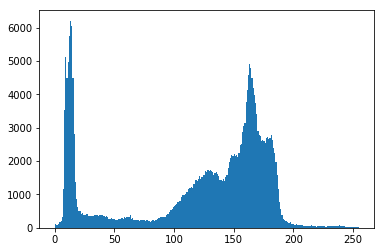

In [65]:
plt.hist(camera.flatten(), bins=255)
plt.show()

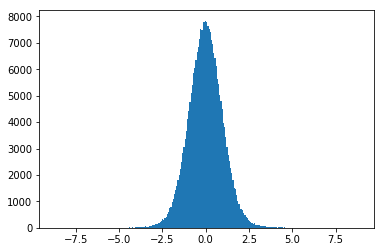

In [66]:
plt.hist(camera_zca.flatten(), bins=255)
plt.show()